### Importing necessary libraries

In [32]:
import pandas as pd
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


### Load the Dataset

In [8]:
# Read the CSV file into a DataFrame from the specified file path

df = pd.read_csv(r"C:\Users\ragha\OneDrive\Desktop\DS_CareeR\NuCoT_TraininG\noTES\Machine Learning\Supervised Learning\Regression\insurance.csv")

In [9]:
#determine the shape of the dataset
df.shape

(1338, 7)

In [10]:
# Retrieve the list of column names in the DataFrame
df.columns

Index(['age', 'gender', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [11]:
# Display the first few rows of the DataFrame to inspect the data
df.head()

,age,gender,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [12]:
# Display information about the DataFrame, including the data types of columns and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   gender    1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [13]:
# Calculate the number of missing values (NaN) for each column in the DataFrame
df.isnull().sum()

age         0
gender      0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [14]:
# Calculate the number of unique values for each column in the DataFrame
df.nunique()

age           47
gender         2
bmi          275
children       6
smoker         2
region         4
expenses    1337
dtype: int64

### Data Preprocessing

In [15]:
# Convert the 'Gender' column to a categorical data type and then encode it with numerical codes
df['gender'] = df['gender'].astype('category')
df['gender'] = df['gender'].cat.codes

df['smoker'] = df['smoker'].astype('category')
df['smoker'] = df['smoker'].cat.codes

df['region'] = df['region'].astype('category')
df['region'] = df['region'].cat.codes


In [16]:
df.head(3)

,age,gender,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46


### Data Visualization

In [17]:
df.columns

Index(['age', 'gender', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

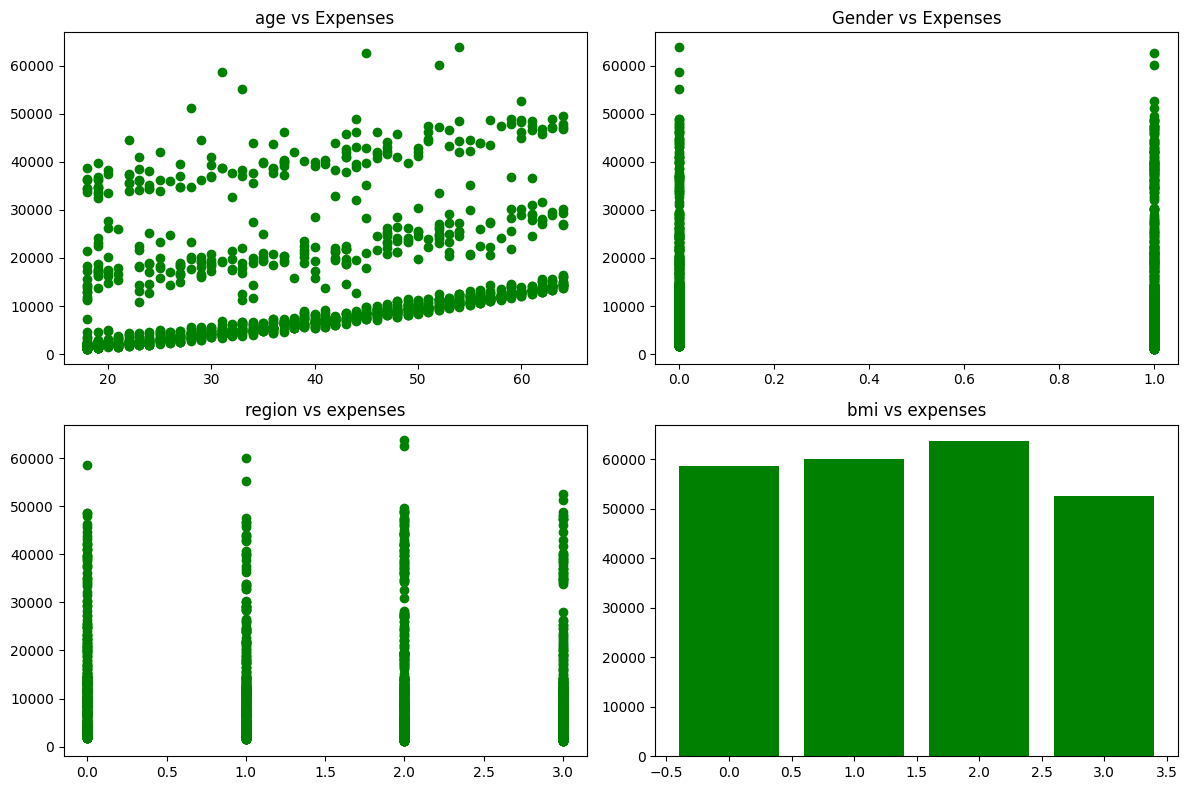

In [18]:

# Create a figure with a size of 12x8 inches
plt.figure(figsize=(12, 8))

# Plot 1: Age vs Purchased
plt.subplot(2, 2, 1)  # Create subplot at position 1
plt.scatter(df['age'], df['expenses'], color='green')  # Scatter plot for Age vs Purchased
plt.title('age vs Expenses')  # Set title for the subplot

# Plot 2: Gender vs Purchased
plt.subplot(2, 2, 2)  # Create subplot at position 2
plt.scatter(df['gender'], df['expenses'], color='green')  # Scatter plot for Gender vs Purchased
plt.title('Gender vs Expenses')  # Set title for the subplot

# # Plot 3: EstimatedSalary vs Purchased
plt.subplot(2, 2, 3)  # Create subplot at position 3
plt.scatter(df['region'], df['expenses'], color='green')  # Scatter plot for EstimatedSalary vs Purchased
plt.title('region vs expenses')  # Set title for the subplot

# # Plot 4: User ID vs Purchased
plt.subplot(2, 2, 4)  # Create subplot at position 4
plt.bar(df['region'], df['expenses'], color='green')  # Scatter plot for User ID vs Purchased
plt.title('bmi vs expenses')  # Set title for the subplot


# Adjust layout to avoid overlapping
plt.tight_layout()

# Display the plots
plt.show()

#### Data Preparation

In [19]:
#Index(['age', 'gender', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

X = df.drop(['expenses'],axis = 1)
Y = df[['expenses']]

In [20]:
X.head(3)

,age,gender,bmi,children,smoker,region
0,19,0,27.9,0,1,3
1,18,1,33.8,1,0,2
2,28,1,33.0,3,0,2


In [21]:
Y.head(3)

,expenses
0,16884.92
1,1725.55
2,4449.46


In [22]:
#split the dataSet for training and testing

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)


In [23]:
# Print the shapes of training and testing data arrays
print(f'shape of X_train = {X_train.shape},\nshape of X_test = {X_test.shape} ,\nshape of Y_train = {Y_train.shape},\nshape of Y_test = {Y_test.shape}')

shape of X_train = (1070, 6),
shape of X_test = (268, 6) ,
shape of Y_train = (1070, 1),
shape of Y_test = (268, 1)


## Machine Learning Model - Linear Regression

#### Linear Regression

In [24]:
# Create a Logistic Regression model instance
linR = LinearRegression()

#### Model Fitting

In [25]:
# Fit the Logistic Regression model to the training data
linR.fit(X_train,Y_train)

LinearRegression()

In [33]:
Y_pred = linR.predict(X_test)

#### Model Evaluation

In [31]:
# Evaluate the Logistic Regression model on the testing data and calculate the accuracy score

print('Accuaracy :',linR.score(X_test,Y_test))

Accuaracy : 0.7728863595227382


In [34]:


# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(Y_test, Y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(Y_test, Y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Absolute Error (MAE): 4217.453798547941
Mean Squared Error (MSE): 36090989.401245505
Root Mean Squared Error (RMSE): 6007.577665019862
